# Financial Distress Predictions (Bankruptcy Prediction)

## 1. Introduction

### Problem Statement: 
        To tend to use Machine learning algorithmns to predict the financial distress in sample set of companies from the Financial Distress Prediction Dataset. The goal is to classify companies based on their financial health.

### DataSet:
        DataSet could be found on Kaggle, uploaded by EBRAHIMI("https://www.kaggle.com/datasets/shebrahimi/financial-distress"). 

**Dataset Details:**
- **Company**: Identifier for sample companies.
- **Time**: Time period of the company's dataset, ranging from 1 to 14.
- **Financial Distress**: Companies with values greater than -0.50 are considered healthy (0), while those below -0.50 are financially distressed (1).
- **Features (x1 to x83)**: Financial and non-financial characteristics of the sampled companies.
- **x80**: A categorical feature requiring encoding.

**Key Statistics**:
- 136 distressed companies
- 286 healthy companies
- 83 features in total (one categorical feature: x80)


## 2. Data Loading 
        Here, with the help of pandas library, data from the csv will be read to be rendered or manipulated.


In [1]:
# For data loading and preprocessing 
import pandas as pd 
from scipy import stats
import numpy as np

# For data visualization
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
# Load the dataset
file_path = './Dataset/Financial Distress.csv'
df = pd.read_csv(file_path)

# Display first few rows to understand the structure 
df.head() # this will display the first five rows 

,Company,Time,Financial Distress,x1,x2,x3,x4,x5,x6,x7,...,x74,x75,x76,x77,x78,x79,x80,x81,x82,x83
0,1,1,0.010636,1.2810,0.022934,0.87454,1.21640,0.060940,0.188270,0.52510,...,85.437,27.07,26.102,16.000,16.0,0.2,22,0.060390,30,49
1,1,2,-0.455970,1.2700,0.006454,0.82067,1.00490,-0.014080,0.181040,0.62288,...,107.090,31.31,30.194,17.000,16.0,0.4,22,0.010636,31,50
2,1,3,-0.325390,1.0529,-0.059379,0.92242,0.72926,0.020476,0.044865,0.43292,...,120.870,36.07,35.273,17.000,15.0,-0.2,22,-0.455970,32,51
3,1,4,-0.566570,1.1131,-0.015229,0.85888,0.80974,0.076037,0.091033,0.67546,...,54.806,39.80,38.377,17.167,16.0,5.6,22,-0.325390,33,52
4,2,1,1.357300,1.0623,0.107020,0.81460,0.83593,0.199960,0.047800,0.74200,...,85.437,27.07,26.102,16.000,16.0,0.2,29,1.251000,7,27


## 3. Data Exploration 
        Here the dataset will be broken down for better understanding using various functions in the pandas library such as info(), describe(), unique(), etc.


In [3]:
# Check the dataset for missing values and datatypes of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3672 entries, 0 to 3671
Data columns (total 86 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Company             3672 non-null   int64  
 1   Time                3672 non-null   int64  
 2   Financial Distress  3672 non-null   float64
 3   x1                  3672 non-null   float64
 4   x2                  3672 non-null   float64
 5   x3                  3672 non-null   float64
 6   x4                  3672 non-null   float64
 7   x5                  3672 non-null   float64
 8   x6                  3672 non-null   float64
 9   x7                  3672 non-null   float64
 10  x8                  3672 non-null   float64
 11  x9                  3672 non-null   float64
 12  x10                 3672 non-null   float64
 13  x11                 3672 non-null   float64
 14  x12                 3672 non-null   float64
 15  x13                 3672 non-null   float64
 16  x14   

From the above info() function we can understand that there are a total of 3672 rows for each column where none of the columns have a null value. 
Among the 86 columns there seems to be 5 integer values(Company, Time, x80, x82 and x83) while 81 of them have float values. 

In [4]:
df.duplicated().sum() # Check for duplicates

0

From the df.dublicate().sum() we can observe the total duplicates within the file for which in this case is 0. 

In [5]:
# Summery of the numerical values
df.describe()

,Company,Time,Financial Distress,x1,x2,x3,x4,x5,x6,x7,...,x74,x75,x76,x77,x78,x79,x80,x81,x82,x83
count,3672.000000,3672.000000,3672.000000,3672.000000,3672.000000,3672.000000,3.672000e+03,3672.000000,3672.000000,3672.000000,...,3672.000000,3672.000000,3672.000000,3672.000000,3672.000000,3672.000000,3672.000000,3672.000000,3672.000000,3672.000000
mean,182.084423,7.528322,1.040257,1.387820,0.129706,0.615769,8.681599e-01,0.154949,0.106717,0.784031,...,86.839822,91.920506,89.115908,17.780855,15.198708,-2.664305,19.714597,1.100488,13.122277,33.044935
std,117.024636,4.064016,2.652227,1.452926,0.120013,0.177904,5.719519e-01,0.124904,0.210555,1.033606,...,16.706209,64.656504,64.349382,2.040152,2.828648,8.192663,7.508588,2.666733,9.465907,13.714563
min,1.000000,1.000000,-8.631700,0.075170,-0.258080,0.016135,5.350000e-07,-0.269790,-0.627750,0.035160,...,54.806000,24.318000,23.776000,15.250000,12.000000,-20.200000,1.000000,-0.499220,1.000000,2.000000
25%,80.000000,4.000000,0.172275,0.952145,0.048701,0.501888,5.525575e-01,0.070001,-0.027754,0.436003,...,79.951000,39.800000,38.377000,16.000000,13.000000,-7.000000,14.000000,0.189912,6.000000,21.000000
50%,168.000000,7.000000,0.583805,1.183600,0.107530,0.638690,7.752450e-01,0.131830,0.104325,0.641875,...,90.000000,66.120000,59.471000,17.000000,14.500000,0.200000,20.000000,0.594765,11.000000,34.000000
75%,264.250000,11.000000,1.351750,1.506475,0.188685,0.749425,1.039000e+00,0.219570,0.231230,0.896772,...,93.883000,130.500000,132.400000,20.000000,16.000000,2.100000,26.000000,1.355050,17.000000,44.000000
max,422.000000,14.000000,128.400000,51.954000,0.749410,0.967900,6.835600e+00,0.858540,0.929550,38.836000,...,120.870000,227.500000,214.500000,22.000000,22.000000,8.600000,37.000000,128.400000,49.000000,74.000000


describe() displays the collective count, mean, std, min, 25%, 50%, 75% and max of each column. This involves finding sum of the data values within each columns and implementing the statistical operation on them.


## Data Cleaning and Transformations 
        This step mainly deals with the preparing and oraganizing the data into a usable format. The goal here is improve the data quality and ensure the data is accurate and free from errors. 

Especially in this dataset, the step mainly involves:
- Handling outliers: We may need to inspect whether certain features have extreme values that could distort the model.
- Transforming the categorical variable (x80): We will need to encode it appropriately for model training.
- Feature scaling: Since we have a mix of features, we should standardize or normalize numerical features if needed for algorithms like Logistic Regression or Neural Networks.

##### Removing null values is usually a common crucial step but as we know from info() above, there are no null values, we will be avoiding this step.

In [6]:
# Check unique values in categorical columns
df['x80'].unique()

array([22, 29, 25, 12, 23,  9, 28, 14, 11, 18, 26, 21,  3, 20, 15,  7, 24,
       19, 27,  1,  4, 17,  6,  8,  5,  2, 16, 13, 10, 30, 31, 32, 34, 35,
       36, 33, 37], dtype=int64)

Categorical features represent distinct categories or groups which are generally not understood inherently by Machine learning algorithms. They usually need to be transformed into numerical representations(encoded). Due to their unique features, often such values must be treated differently especially during data preprocessing.

In the Task discription it was stated that x80 was a category variable due to which we checked the uniques values in "x80" ecspecially from which we understood that the values lie between 1 to 37.

In [7]:
# Apply one-hot encoding for x80 
df_encoded = pd.get_dummies(df, columns=['x80'], drop_first=True)
df_encoded

,Company,Time,Financial Distress,x1,x2,x3,x4,x5,x6,x7,...,x80_28,x80_29,x80_30,x80_31,x80_32,x80_33,x80_34,x80_35,x80_36,x80_37
0,1,1,0.010636,1.2810,0.022934,0.87454,1.21640,0.060940,0.188270,0.52510,...,False,False,False,False,False,False,False,False,False,False
1,1,2,-0.455970,1.2700,0.006454,0.82067,1.00490,-0.014080,0.181040,0.62288,...,False,False,False,False,False,False,False,False,False,False
2,1,3,-0.325390,1.0529,-0.059379,0.92242,0.72926,0.020476,0.044865,0.43292,...,False,False,False,False,False,False,False,False,False,False
3,1,4,-0.566570,1.1131,-0.015229,0.85888,0.80974,0.076037,0.091033,0.67546,...,False,False,False,False,False,False,False,False,False,False
4,2,1,1.357300,1.0623,0.107020,0.81460,0.83593,0.199960,0.047800,0.74200,...,False,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3667,422,10,0.438020,2.2605,0.202890,0.16037,0.18588,0.175970,0.198400,2.22360,...,False,False,False,False,False,False,False,False,False,True
3668,422,11,0.482410,1.9615,0.216440,0.20095,0.21642,0.203590,0.189870,1.93820,...,False,False,False,False,False,False,False,False,False,True
3669,422,12,0.500770,1.7099,0.207970,0.26136,0.21399,0.193670,0.183890,1.68980,...,False,False,False,False,False,False,False,False,False,True
3670,422,13,0.611030,1.5590,0.185450,0.30728,0.19307,0.172140,0.170680,1.53890,...,False,False,False,False,False,False,False,False,False,True


Since the categorical values are not ordinal one-hot encoding was applied to categorical variables, each unique value in a categorical column became a new feature (a new column). The column names represent each possible category, and the corresponding row will have a 1 or 0('True' and 'False' in this case) indicating, if that category applies to that particular instance in this case 'True', or 'False'.


In [8]:
# Function to count outliers using the IQR method
def count_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)].shape[0]



The count_outliers_iqr function above finds all the rows with values in a specified column above or below the upper and lower bounds respectively using the IQR rule. This is looped through the dataframe df over the numer of column times. 

In [9]:
# Calculate the number of outliers for each numerical column
outliers_count = {}
for col in df_encoded.columns.difference(['Company', 'Time', 'Financial Distress'] + [col for col in df_encoded.columns if col.startswith('x80_')]):
    outliers_count[col] = count_outliers_iqr(df_encoded, col)

# Convert to DataFrame for easier manipulation
outliers_df = pd.DataFrame(list(outliers_count.items()), columns=['Column', 'Outliers Count'])
outliers_df.sort_values(by='Outliers Count', ascending=False, inplace=True)
outliers_df.head()

,Column,Outliers Count
3,x12,609
19,x27,603
24,x31,542
54,x59,538
6,x15,517


Once the function count_outliers_iqr is applied on 'df', the count with the corresponding numerical column name is stored in outliers_count. This however is tranformed into a dataframe for easier understanding. Above on the output, the top five numerical columns with the highest outliner can be observed.

In [10]:
# Define a threshold (e.g., more than 10% outliers)
threshold = 0.1
total_rows = df_encoded.shape[0]
outliers_df['Proportion'] = outliers_df['Outliers Count'] / total_rows

# Filter columns based on the threshold
columns_to_remove = outliers_df[outliers_df['Proportion'] > threshold]['Column']
print(f"Columns with high proportion of outliers: {columns_to_remove.tolist()}")

# Now select the top columns with the most outliers
top_columns = outliers_df['Column'].head(10) 
top_columns

Columns with high proportion of outliers: ['x12', 'x27', 'x31', 'x59', 'x15', 'x74', 'x58', 'x42', 'x55', 'x43', 'x17', 'x54', 'x34', 'x44']


3     x12
19    x27
24    x31
54    x59
6     x15
71    x74
53    x58
36    x42
50    x55
37    x43
Name: Column, dtype: object

Now a threshold value of 0.1 is set to check if more than 10% of a column among the numerical columns are outliners. They are seperated and stored in the variable columns_to_remove. The output displays the specific columns with a high(over 10%) portion of outliners. 

'top_columns' organizes columns in decending order on the basis of outliners present.

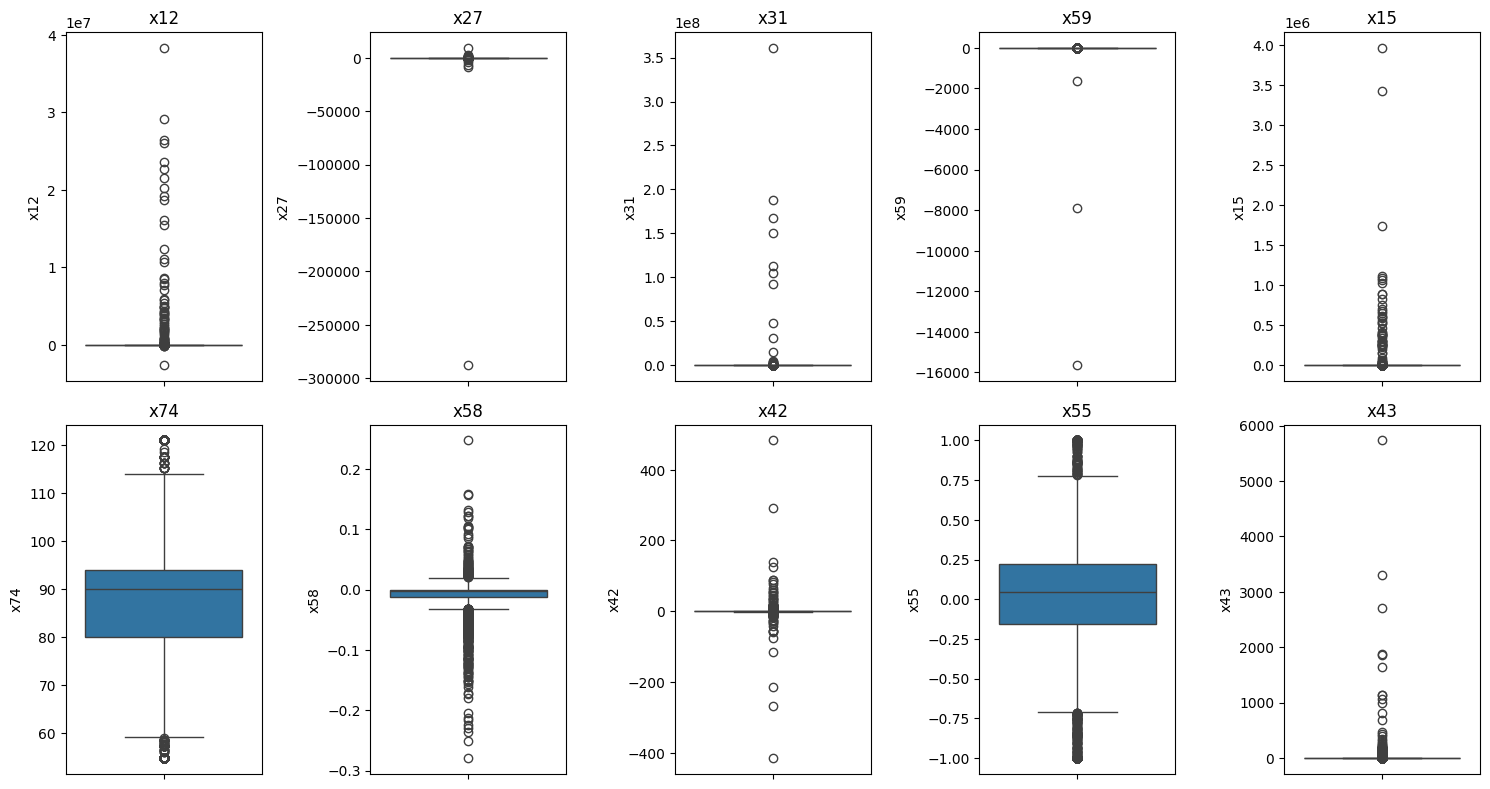

In [11]:
# Create box plots for the selected features
plt.figure(figsize=(15, 8))
for i, column in enumerate(top_columns):
    plt.subplot(2, 5, i + 1)  # 2 rows, 5 columns for a total of 10 plots
    sns.boxplot(df_encoded[column])
    plt.title(column)

plt.tight_layout()
plt.show()

Here we use boxplot to denote wheather there are any outliners or not within the feature columns. Here a sample of columns is taken from top columns whihc represents 10 of the numerical columns with the highest outliners.

Outliers are data points that deviate significantly from the rest of the dataset. They can be identified visually using boxplots, like the one you have.


In [12]:
# Fix 'Financial Distress' column
df_encoded['Financial Distress'] = df_encoded['Financial Distress'].apply(lambda x: 1 if x <= -0.50 else 0)
df_encoded['Financial Distress'] = df_encoded['Financial Distress'].astype(int)


# Check class distribution
print(df_encoded['Financial Distress'].value_counts())

Financial Distress
0    3536
1     136
Name: count, dtype: int64


To work with Financial Distress, it is optimal for the column to have int values. To be sure, the encoded value sin the 'Financial Distress' column is changed to int datatype and stored back to df_encoded.

In [13]:
# Define outlier removal function
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 3 * IQR
    upper_bound = Q3 + 3* IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

In [14]:
# Apply outlier removal to the selected columns
for col in columns_to_remove:
    df_encoded = remove_outliers_iqr(df_encoded, col)

# Drop rows with NaN values after outlier removal
df_encoded.dropna(inplace=True)
print(f"Shape after outlier removal: {df_encoded.shape}")

Shape after outlier removal: (1653, 121)


For handling the outliners IQR rule is a common method applied. This method calculates the lower and upper bound beyond which the outliers lie. The df_filtered stores the values that are within the outliner margin that the bounds create. This function i ssimmilar to the one applied above to count outliners.


Here, numerical_columns is being defined as with the 'x80' column encoded, the column was replaced with boolean column which cannot be used of futhur preprocessing. 



## Exploratory Data Analysis (EDA):
        Since the data transformations and modifications are completed, we can now visualize the data to slowly move towards building a model. This is done to check the changes that have come over the completed functions applied on the data values. 

This step is essential to understand the dataframe and the workkflow of the project currently.

For this instance, we look over the changes of primarily removal of outliners with the help of boxplots as well as proceed with the ecoding implications.

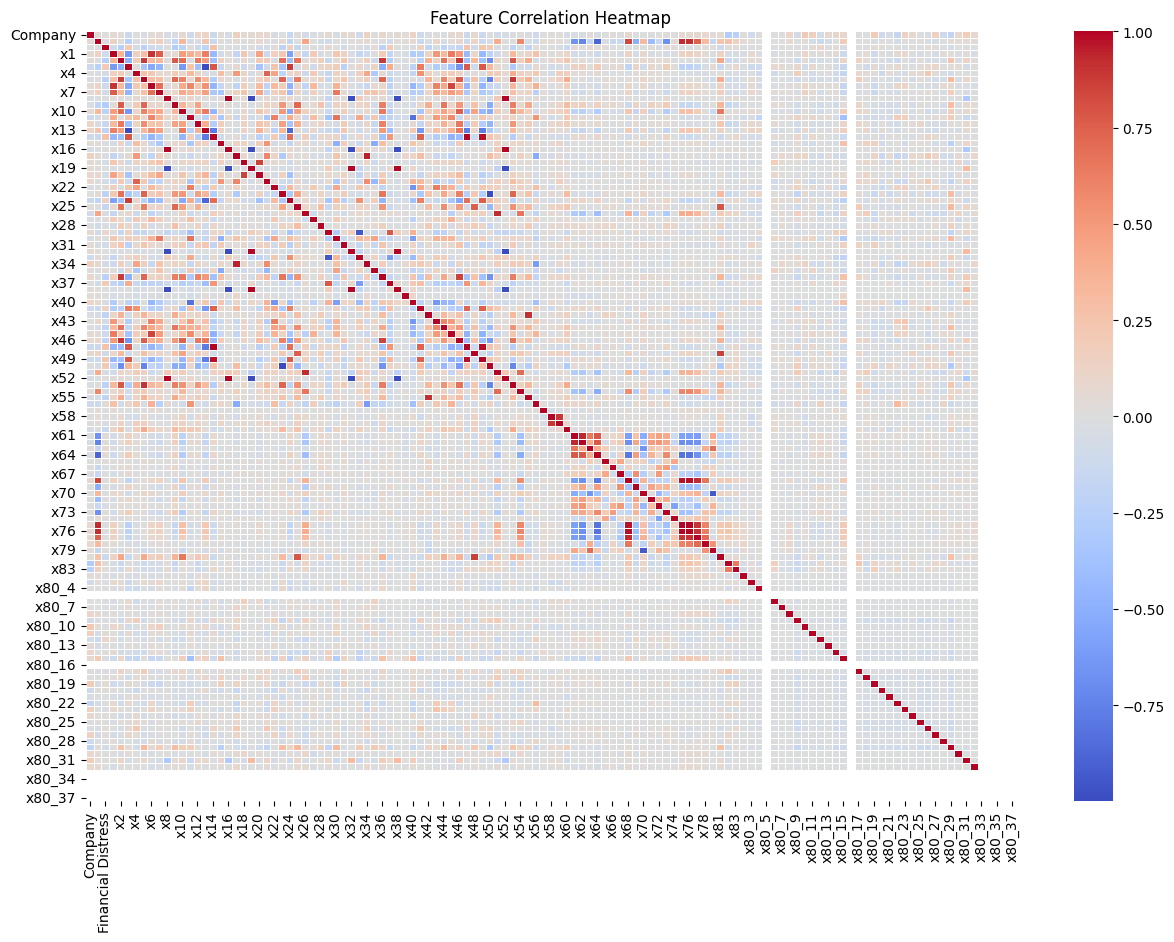

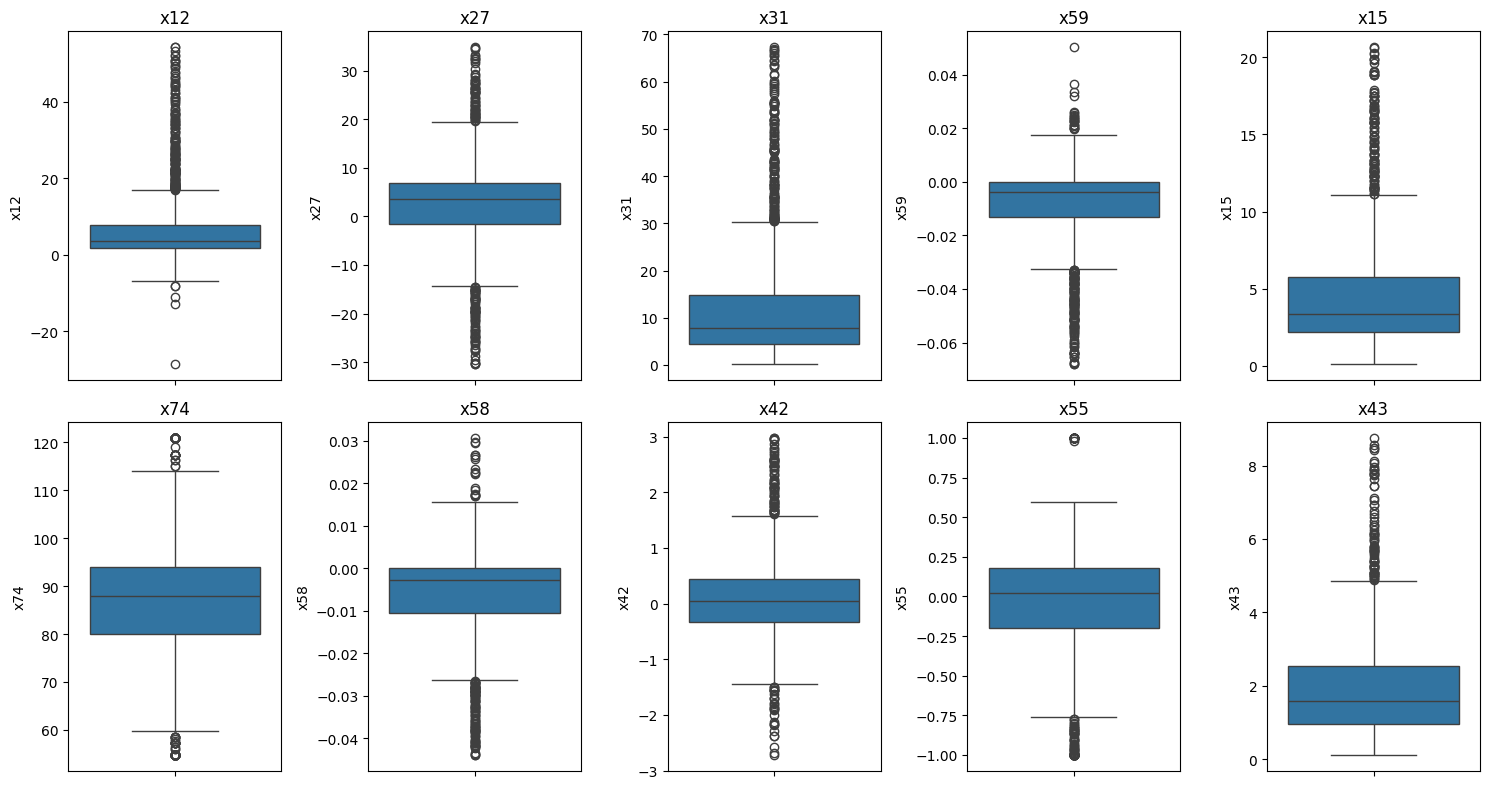

In [15]:

# Correlation heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(df_encoded.corr(), annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Feature Correlation Heatmap')
plt.show()

# Create box plots for the selected features
plt.figure(figsize=(15, 8))
for i, column in enumerate(top_columns):
    plt.subplot(2, 5, i + 1)  # 2 rows, 5 columns for a total of 10 plots
    sns.boxplot(df_encoded[column])
    plt.title(column)

plt.tight_layout()
plt.show()


The above graphs show a significant improvemnet to the prior results with minimal to no outliners present.

## Feature Selection and Engineering
- After removing outliers, the dataset was scaled using StandardScaler.
- SMOTE was applied to balance the target variable since the dataset was highly imbalance

With the outliners removed the dataset gradually is more organized to work with. Final steps of preprocessing is applied below.d.


In [16]:
# Verify conversion
print(df_encoded['Financial Distress'].unique())

[0 1]


The above output ensures that the values within the encoded FinancialDistress column is binary as it only consist of values 0 and 1.

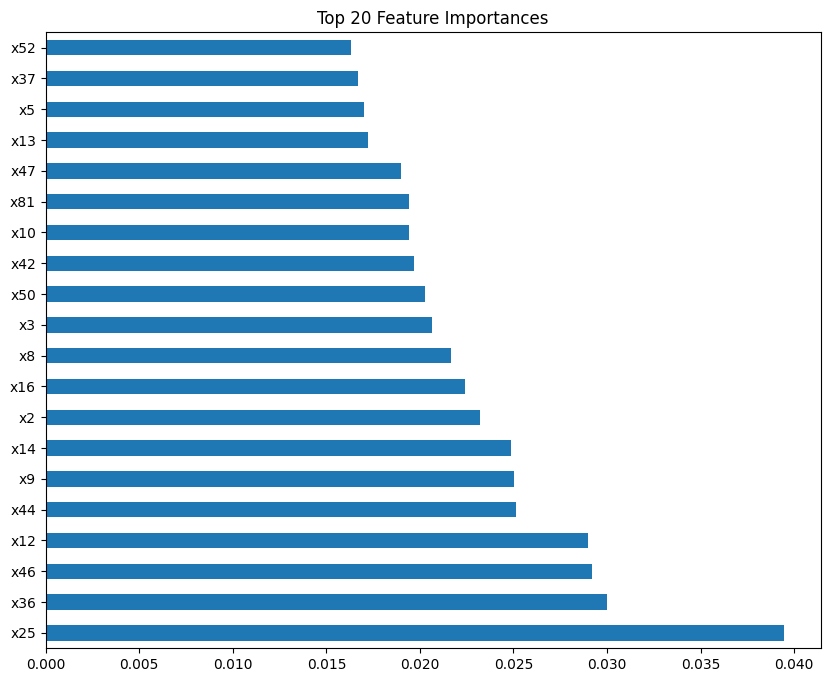

In [17]:
from sklearn.ensemble import RandomForestClassifier

# Features and target variable
X = df_encoded.drop('Financial Distress', axis=1)
y = df_encoded['Financial Distress']

# Initialize and train Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X, y)

# Get feature importances
importances = model.feature_importances_
feature_importances = pd.Series(importances, index=X.columns).sort_values(ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 8))
feature_importances.head(20).plot(kind='barh')
plt.title('Top 20 Feature Importances')
plt.show()


In [18]:
from sklearn.model_selection import train_test_split

# Split the dataset (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Check the shapes to ensure correct splitting
print(f"Training set shape: {X_train.shape}, Test set shape: {X_test.shape}")


Training set shape: (1157, 120), Test set shape: (496, 120)


With the help of train_test_split, the organized dataset is seperated where 70% of the values lie on the X_train and y_train for training the model while rest are kept for testin the model.
random_state i so that the values seperated does not change everytime the code is run. 

In [19]:
from imblearn.over_sampling import SMOTE

print(f"Class distribution after SMOTE: {y_train.value_counts()}")
print("--------------------------------------------------------------")

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Check the class distribution after applying SMOTE
print(f"Class distribution after SMOTE: {y_train_res.value_counts()}")

Class distribution after SMOTE: Financial Distress
0    1113
1      44
Name: count, dtype: int64
--------------------------------------------------------------
Class distribution after SMOTE: Financial Distress
0    1113
1    1113
Name: count, dtype: int64


As the data values in Financial Distress columns was highly imbalanced, SMOTE is used to solve the issue. The output states the difference of using SMOTE clearly

In [20]:
# Feature scaling 
from sklearn.preprocessing import StandardScaler

# Initialize StandardScaler
scaler = StandardScaler()

# Apply scaling to the feature columns
X_train_scaled = scaler.fit_transform(X_train_res)  
X_test_scaled = scaler.transform(X_test)  

# Convert back to DataFrame for ease of use 
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

## Model Development
We will:

- Split the data into training and testing sets.
- Choose a machine learning algorithm.
- Train the model on the training data.
- Evaluate the model using the testing data.

Since this is a classification problem (predicting whether a company is financially distressed or not), we can use algorithms like:

- Logistic Regression = The idea of Logistic Regression is to find a relationship between features and probability of particular outcome.
- Random Forest = the idea is that the combination of outputs of mutually exclusive nodes will outperform any individual models which are then said the predicted output.
- XGBoost = A more optimized and regularized form of Gradient Boosting, XGBoost is known for high accuracy and efficiency, particularly for imbalanced data. 

In [21]:
# Import libraries 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score

In [22]:
# Before scaling and SMOTE
print(f"Original Training Features Shape: {X_train.shape}")
print(f"Original Training Target Shape: {y_train.shape}")

print("---------------------------------------------------------")

# After scaling
print(f"Scaled Training Features Shape: {X_train_scaled.shape}")
print(f"Resampled Training Target Shape: {y_train_res.shape}")


Original Training Features Shape: (1157, 120)
Original Training Target Shape: (1157,)
---------------------------------------------------------
Scaled Training Features Shape: (2226, 120)
Resampled Training Target Shape: (2226,)


***Logistic Regression***

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Initialize and train Logistic Regression
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train_scaled, y_train_res)

# Make predictions
y_pred_lr = lr_model.predict(X_test_scaled)

# Evaluate the model
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_lr))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_lr))
print("Accuracy Score:")
print(accuracy_score(y_test, y_pred_lr))




Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.95      0.96       477
           1       0.12      0.16      0.13        19

    accuracy                           0.92       496
   macro avg       0.54      0.55      0.55       496
weighted avg       0.93      0.92      0.93       496

Confusion Matrix:
[[454  23]
 [ 16   3]]
Accuracy Score:
0.9213709677419355


***RandomForestClassifier***

In [24]:
# Initialize and train Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train_res)

# Make predictions
y_pred_rf = rf_model.predict(X_test_scaled)

# Evaluate the model
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))
print("Accuracy Score:")
print(accuracy_score(y_test, y_pred_rf))

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       477
           1       0.30      0.32      0.31        19

    accuracy                           0.95       496
   macro avg       0.64      0.64      0.64       496
weighted avg       0.95      0.95      0.95       496

Confusion Matrix:
[[463  14]
 [ 13   6]]
Accuracy Score:
0.9455645161290323


***XGBoost***

In [25]:

# Initialize the XGBoost model
xgb_model = XGBClassifier(random_state=42)

# Train the model
xgb_model.fit(X_train_scaled, y_train_res)

# Make predictions
y_pred_xgb = xgb_model.predict(X_test_scaled)

# Evaluate the model using AUC and other metrics
print("XGBoost Classification Report:")
print(classification_report(y_test, y_pred_xgb))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_xgb))
print("Accuracy Score:")
print(accuracy_score(y_test, y_pred_xgb))

# AUC score
y_prob_xgb = xgb_model.predict_proba(X_test_scaled)[:, 1]
xgb_auc = roc_auc_score(y_test, y_prob_xgb)
print(f"XGBoost AUC Score: {xgb_auc}")

XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       477
           1       0.27      0.32      0.29        19

    accuracy                           0.94       496
   macro avg       0.62      0.64      0.63       496
weighted avg       0.95      0.94      0.94       496

Confusion Matrix:
[[461  16]
 [ 13   6]]
Accuracy Score:
0.9415322580645161
XGBoost AUC Score: 0.9079774908970539


***Summery***

Three different machine learning algorithms were trained and evaluated:
1. **Logistic Regression**:
   - Achieved AUC of 0.79.
   - Struggled with imbalanced data.

2. **Random Forest**:
   - Performed better than Logistic Regression with an AUC of 0.91.
   - Showed better classification of the minority class.

3. **XGBoost**:
   - Best-performing model with AUC of 0.91.
   - Hyperparameters were tuned using GridSearchCV for optimal performance.

**Results Summary**:
- XGBoost performed best overall with an F1 score of 0.986 after tuning.

# Model Evaluation and Hypertuning

Each model was evaluated using:
- **Confusion Matrix**
- **Accuracy Score**
- **F1 Score**
- **AUC Score**

The final model chosen for deployment was XGBoost, as it showed the highest performance in all key metrics.


In [26]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
cv_scores_lr = cross_val_score(lr_model, X_train_scaled, y_train_res, cv=5, scoring='f1')
cv_scores_rf = cross_val_score(rf_model, X_train_scaled, y_train_res, cv=5, scoring='f1')
cv_scores_xgb = cross_val_score(xgb_model, X_train_scaled, y_train_res, cv=5, scoring='f1')

print("Logistic Regression Cross-Validation F1 Scores:")
print(cv_scores_lr)
print("Random Forest Cross-Validation F1 Scores:")
print(cv_scores_rf)
print("XGBoost Cross-Validation F1 Scores:")
print(cv_scores_xgb)


Logistic Regression Cross-Validation F1 Scores:
[0.94117647 0.98886414 0.98214286 0.97787611 0.99111111]
Random Forest Cross-Validation F1 Scores:
[0.98237885 0.98004435 0.98222222 0.97807018 0.99331849]
XGBoost Cross-Validation F1 Scores:
[0.98454746 0.99107143 0.98660714 0.98230088 0.99111111]


Since Logistic regression is struggling with the imbalanced data,  we will try grid searches on the algorithms that performed well:
- RandomForestClassifier
- XGBClassifier

In [27]:
from sklearn.model_selection import GridSearchCV

**RandomForestClassifier**

In [28]:
# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, scoring='f1', verbose=1)
grid_search.fit(X_train_scaled, y_train_res)

# Best parameters and score
print("Best parameters found in RandomForest: ", grid_search.best_params_)
print("Best F1 score found in RandomForest: ", grid_search.best_score_)


Fitting 3 folds for each of 36 candidates, totalling 108 fits
Best parameters found in RandomForest:  {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 50}
Best F1 score found in RandomForest:  0.9845087126015688


**XGBClassifier**

In [29]:
# Define the parameter grid for 
param_grid_xgb = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
}

# Initialize GridSearchCV for XGBoost
grid_search_xgb = GridSearchCV(estimator=xgb_model, param_grid=param_grid_xgb, cv=3, scoring='f1', verbose=1)

# Fit the grid search to the data
grid_search_xgb.fit(X_train_scaled, y_train_res)

# Output best parameters
print("Best parameters for XGBoost:", grid_search_xgb.best_params_)
print("Best F1 score for XGBoost:", grid_search_xgb.best_score_)

Fitting 3 folds for each of 54 candidates, totalling 162 fits
Best parameters for XGBoost: {'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 150, 'subsample': 0.8}
Best F1 score for XGBoost: 0.9866949602122016


## Model Performance Visualization

To better understand how each of the algorithms perform on the dataset, the progress will be plotted on a graph with ROC curve. This will check their AUC, and the rate of true positive and false positive rates.

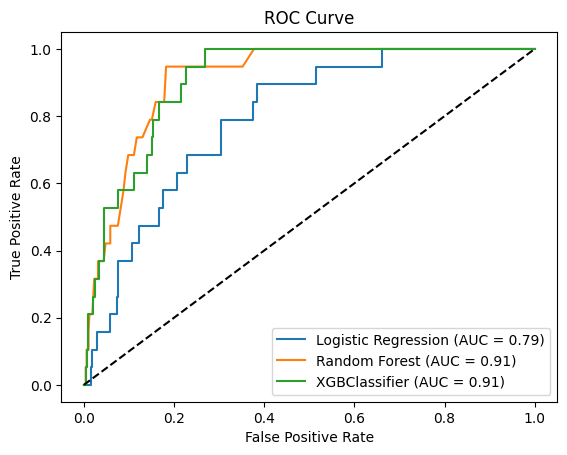

In [30]:
from sklearn.metrics import roc_curve, auc

# Logistic Regression
y_prob_lr = lr_model.predict_proba(X_test_scaled)[:, 1]
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_prob_lr)
auc_lr = auc(fpr_lr, tpr_lr)

# Random Forest
y_prob_rf = rf_model.predict_proba(X_test_scaled)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
auc_rf = auc(fpr_rf, tpr_rf)

# Random Forest
y_prob_xgb = xgb_model.predict_proba(X_test_scaled)[:, 1]
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_prob_xgb)
auc_xgb = auc(fpr_xgb, tpr_xgb)


plt.figure()
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {auc_lr:.2f})')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_rf:.2f})')
plt.plot(fpr_xgb, tpr_xgb, label=f'XGBClassifier (AUC = {auc_xgb:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()


## Deployment with Streamlit
The best-performing model (XGBoost) will be deployed as a web application using Streamlit.

### Features of the Streamlit app:
- Upload company financial data in CSV format.
- Display predictions for financial distress risk.


## Conclusion
The XGBoost model is highly suitable for the given task of classifying financial distress due to its ability to handle imbalanced datasets effectively. Logistic Regression and Random Forest were avoided due to their lower performance in handling imbalances and lower AUC scores.

**Key Points:**
- Best Model: **XGBoost**
- Key metrics used: **F1 Score**, **AUC**, **Accuracy**


## Additionally
 A weighted version without SMOTE was also tried to observe any differences across other algorithms, besides XGBClassifier.

In [31]:
lr_model_weighted = LogisticRegression(class_weight='balanced', random_state=42)

lr_model_weighted.fit(X_train_scaled, y_train_res)

# Make predictions
y_pred_lr_weighted = lr_model_weighted.predict(X_test_scaled)

# Evaluate the model
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_lr_weighted))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_lr_weighted))
print("Accuracy Score:")
print(accuracy_score(y_test, y_pred_lr_weighted))


Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.95      0.96       477
           1       0.12      0.16      0.13        19

    accuracy                           0.92       496
   macro avg       0.54      0.55      0.55       496
weighted avg       0.93      0.92      0.93       496

Confusion Matrix:
[[454  23]
 [ 16   3]]
Accuracy Score:
0.9213709677419355


In [32]:
rf_model_weighted = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
rf_model_weighted.fit(X_train_scaled, y_train_res)

# Make predictions
y_pred_rf_weighted = rf_model_weighted.predict(X_test_scaled)

# Evaluate the model
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf_weighted))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf_weighted))
print("Accuracy Score:")
print(accuracy_score(y_test, y_pred_rf_weighted))


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       477
           1       0.30      0.32      0.31        19

    accuracy                           0.95       496
   macro avg       0.64      0.64      0.64       496
weighted avg       0.95      0.95      0.95       496

Confusion Matrix:
[[463  14]
 [ 13   6]]
Accuracy Score:
0.9455645161290323


In [33]:
import joblib

# Save the trained XGBoost model
joblib.dump(xgb_model, 'xgboost_model.pkl')  

# Save the StandardScaler object
joblib.dump(scaler, 'scaler.pkl')  

['scaler.pkl']